---
<center>

  # **Prelongitudongitudongitudiminares del curso Mecánica Cuántica Avanzada**

---
**Realizado Por:**

   Samuel Huertas Rojas

---
</center>

# Bases

## Bases trigonometricas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Bases ortonormales completas en el intervalo [0, L] 

# Funciones de base de seno
def base_seno(
        numero_bases,
        coordenada_x: float,
        longitud_intervalo,
):
    base = np.sqrt(2/longitud_intervalo) * np.sin(numero_bases * np.pi * coordenada_x / longitud_intervalo)

    return base

# funciones de base de coseno
def base_coseno(
        numero_bases,
        coordenada_x: float,
        longitud_intervalo,
):
    if numero_bases == 1:
        base = np.sqrt(1/longitud_intervalo) * np.ones_like(coordenada_x)
    else:
        base = np.sqrt(2/longitud_intervalo) * np.cos(numero_bases * np.pi * coordenada_x / longitud_intervalo)

    return base

# funciones de base exponencial
def base_exponencial(
        numero_bases,
        coordenada_x: float,
        longitud_intervalo,
):
    base = (1/np.sqrt(longitud_intervalo)) * np.exp(1j * 2 * np.pi * numero_bases * coordenada_x / longitud_intervalo)

    return base

In [38]:
lon = 1
x = np.linspace(0, lon, 1000)
n = np.arange(1, 5)


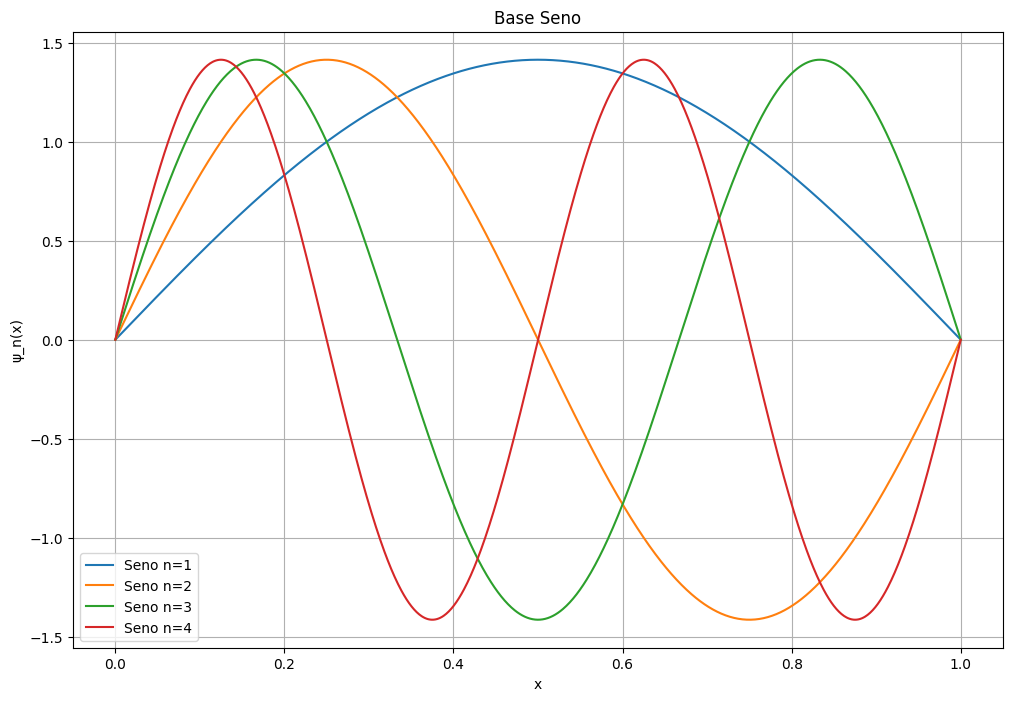

In [39]:
# Graficar las bases
plt.figure(figsize=(12, 8))
for i in n:
    plt.plot(x, base_seno(i, x, lon), label=f'Seno n={i}')

plt.title('Base Seno')
plt.xlabel('x')
plt.ylabel('ψ_n(x)')
plt.legend()
plt.grid()
plt.show()


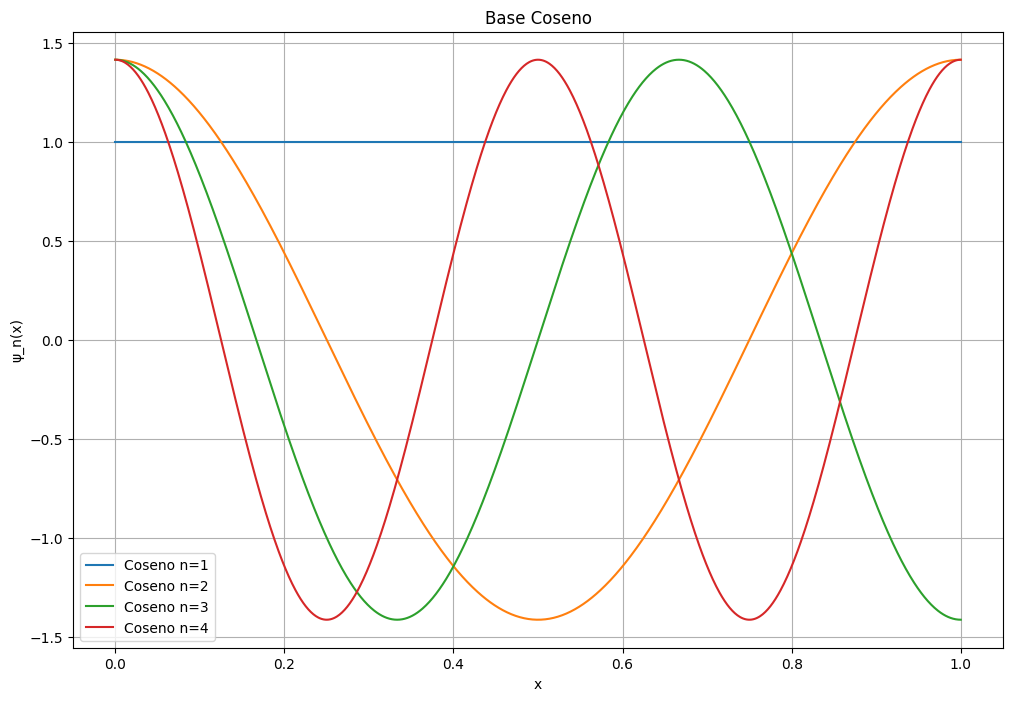

In [40]:
plt.figure(figsize=(12, 8))
for i in n:
    plt.plot(x, base_coseno(i, x, lon), label=f'Coseno n={i}')

plt.title('Base Coseno')
plt.xlabel('x')
plt.ylabel('ψ_n(x)')
plt.legend()
plt.grid()
plt.show()

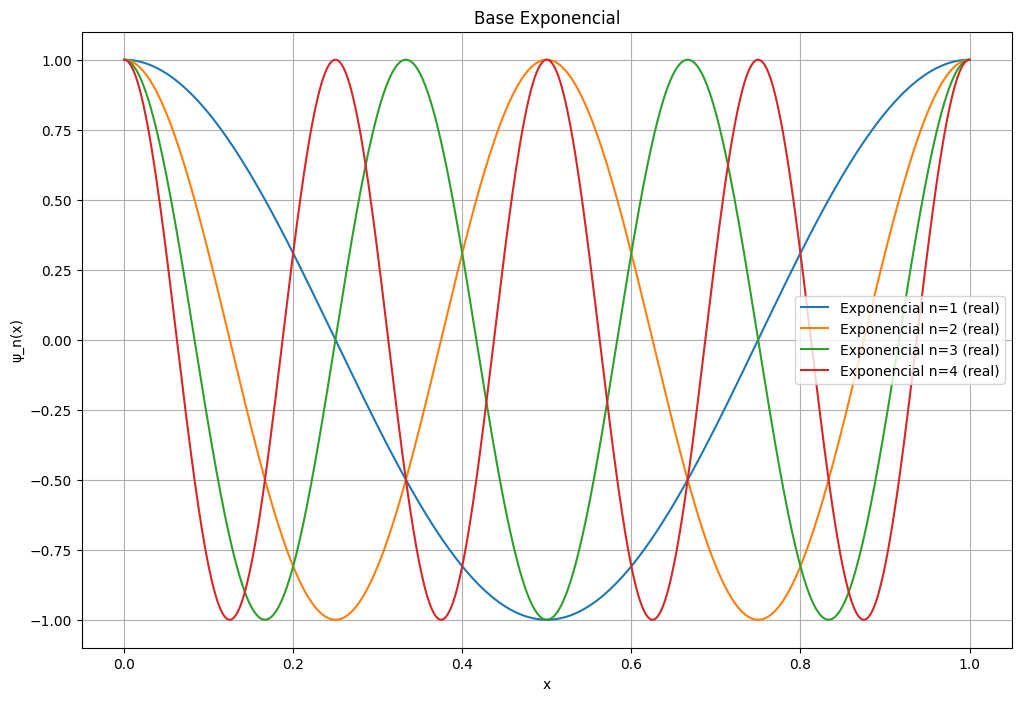

In [41]:
plt.figure(figsize=(12, 8))
for i in n:
    plt.plot(x, base_exponencial(i, x, lon).real, label=f'Exponencial n={i} (real)')

plt.title('Base Exponencial')
plt.xlabel('x')
plt.ylabel('ψ_n(x)')
plt.legend()
plt.grid()
plt.show()

## Comprobación de la normalización en la base de senos

In [43]:
for i in n:
    for j in n:
        integrando_seno = base_seno(i, x, lon) * base_seno(j, x, lon)
        integral = np.abs(np.trapezoid(integrando_seno, x))
        print(f"<{i}|{j}> = ", round(integral, 1))

<1|1> =  1.0
<1|2> =  0.0
<1|3> =  0.0
<1|4> =  0.0
<2|1> =  0.0
<2|2> =  1.0
<2|3> =  0.0
<2|4> =  0.0
<3|1> =  0.0
<3|2> =  0.0
<3|3> =  1.0
<3|4> =  0.0
<4|1> =  0.0
<4|2> =  0.0
<4|3> =  0.0
<4|4> =  1.0


## Desarrollo de función en una base

C:\Users\samhu\AppData\Local\Temp\ipykernel_10344\668317801.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


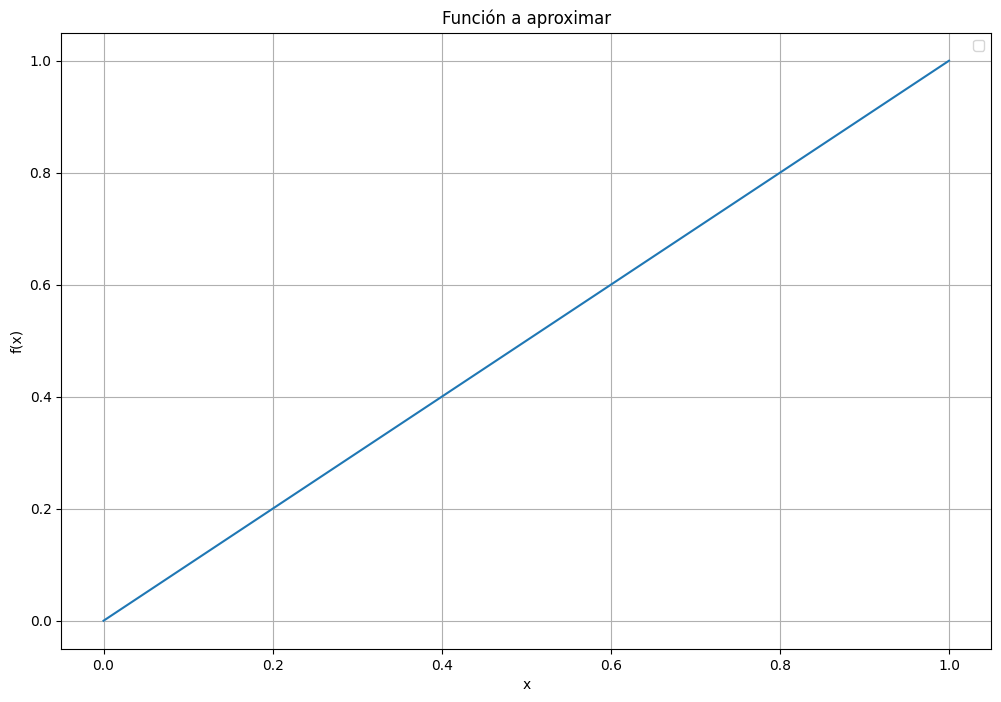

In [44]:
def funcion_aprox(
        x,
        parametro,
        longitud,
):
    f = x
    return f

parametro = 15
f = funcion_aprox(x, parametro, lon)

plt.figure(figsize=(12, 8))

plt.plot(x, f)
plt.title('Función a aproximar')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

In [45]:
# Encontrar los coeficientes de la aproximación
coeficientes = []
numero_bases = 100
n = np.arange(1, numero_bases + 1)
for i in n:
    integrando_coef = f * base_seno(i, x, lon)
    coef = np.trapezoid(integrando_coef, x)
    coeficientes.append(coef)
    #print(f"c_{i} = ", round(coef, 4))

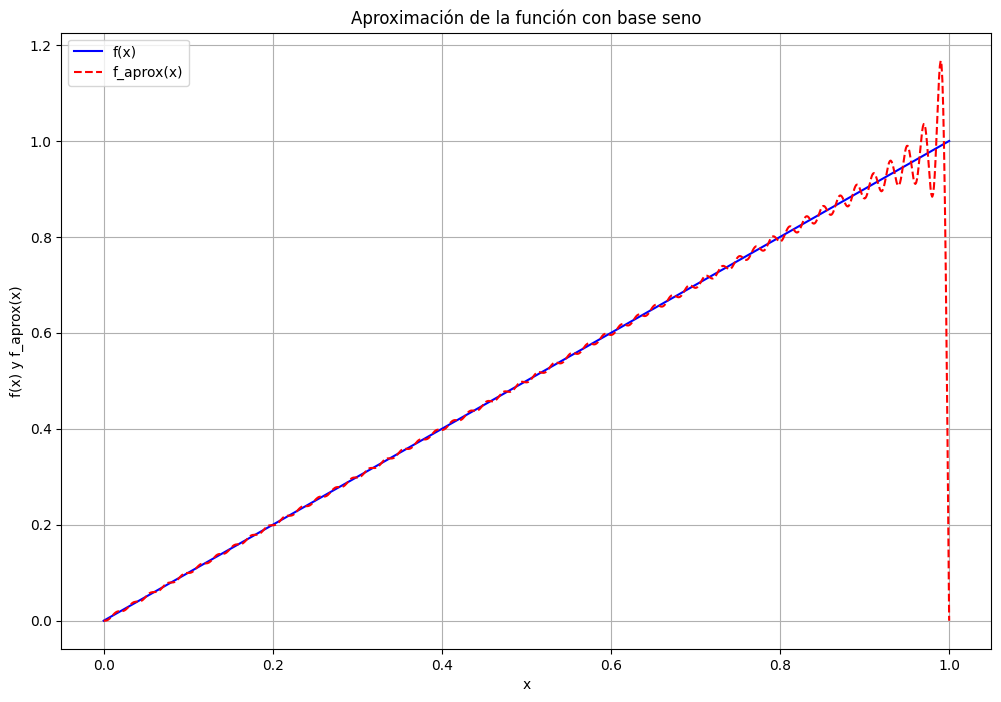

In [46]:
# Aproximar la función con la base seno
f_aprox = np.zeros_like(x)
for i, coef in zip(n, coeficientes):
    f_aprox += coef * base_seno(i, x, lon)

plt.figure(figsize=(12, 8))
plt.plot(x, f, label='f(x)', color='blue')
plt.plot(x, f_aprox, label='f_aprox(x)', color='red', linestyle='--')
plt.title('Aproximación de la función con base seno')
plt.xlabel('x')
plt.ylabel('f(x) y f_aprox(x)')
plt.legend()
plt.grid()
plt.show()


## Realcion de cierre

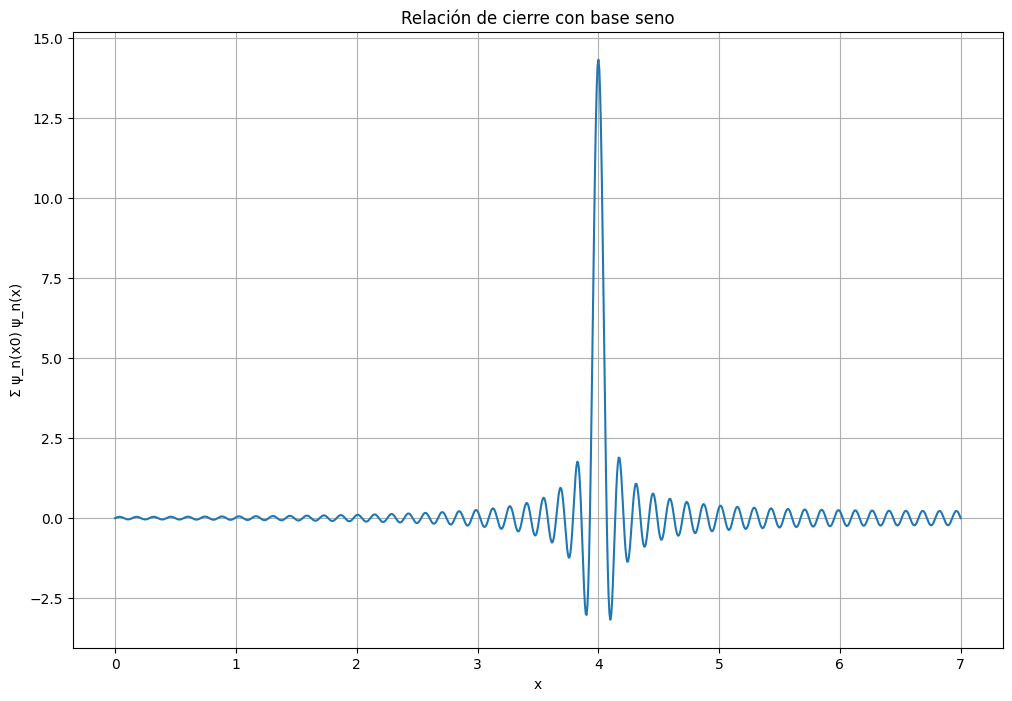

In [51]:
def relacion_cierre_seno(
        coordenada_x,
        coordenada_x0,
        longitud_intervalo,
        n_max=100,
):
    suma = 0
    for n in range(1, n_max + 1):
        suma += base_seno(n, coordenada_x0, longitud_intervalo) * base_seno(n, coordenada_x, longitud_intervalo)

    return suma

## Realcion de cierre
lon = 7
x0 = 4
x = np.linspace(0, lon, 1000)
y = relacion_cierre_seno(x, x0, lon, n_max=100)
plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.title('Relación de cierre con base seno')
plt.xlabel('x')
plt.ylabel('Σ ψ_n(x0) ψ_n(x)')
plt.grid()
plt.show()